# Numerically Solving Some Classical Models

In [138]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## Ising model 

### Defining the free energy and its derivatives 

In [250]:
def f_x(m, T):
    return m-np.tanh(m/T)

def f_xx(m,T):
    return 1-(1-(np.tanh(m/T))**2)/T 

def stability_condition2(m,T):
    return True if f_xx(m,T) > 0 else False

### Defining the equations of state and the stability condition 

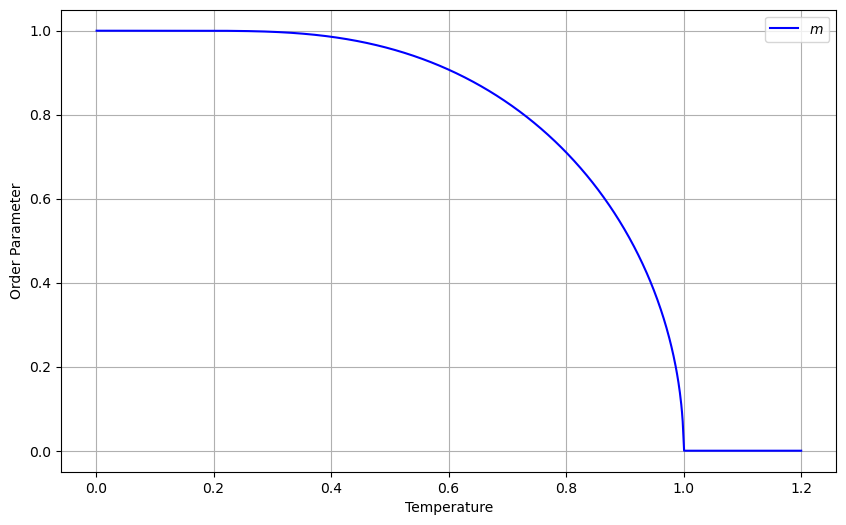

In [253]:
# Solve for a range of temperatures
T_vals = np.linspace(0.001, 1.2, 1000)
m_vals = []

for t in T_vals:
    sol = fsolve(lambda m: f_x(m,t), [10,10])  # Initial guess [0, 0]
    m_vals.append(sol[0])

m_stable=[]
T_stable=[]

for i in range(len(T_vals)): 
    if  stability_condition2(m_vals[i],T_vals[i]): 
        m_stable.append(m_vals[i])
        T_stable.append(T_vals[i])

# Plot
fig3=plt.figure(figsize=(10, 6))
plt.plot(T_stable, m_stable, label=r'$m$', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()


## Potts Model

In [106]:
def f_x(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_x."""
    exp1 = np.exp(m_x/T)
    exp2 = np.exp(- m_x / (2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y / (2*T))
    
    numerator = exp1 - exp2 * cosh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    
    return 3/2 * m_x - numerator / denominator

def f_y(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_y."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3) * m_y /(2*T))
    
    numerator = np.sqrt(3) * sinh_term
    denominator = exp1 + 2 * cosh_term

    return 3/2 * m_y -  numerator / denominator

def f_xx(m_x, m_y, T): #C
    """Calculate the second derivative f_xx."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator=exp1*(-3+4*T)*cosh_term + T*(2+exp2+2*cosh_term)
    denominator=exp1+2*cosh_term

    return (3/(2*T)) * (numerator / denominator**2)

def f_yy(m_x, m_y, T):
    """Calculate the second derivative f_yy."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator= 3*(-2+ T*(2+exp2) + exp1*(-1+4*T)*cosh_term+2*T*cosh_term)
    denominator=2*T*(exp1+2*cosh_term)**2

    
    return 3/2 - numerator / denominator

def f_xy(m_x, m_y, T): #C
    """Calculate the second derivative f_xy."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3)* m_y /(2*T))
    
    numerator= 3*np.sqrt(3)*exp1*sinh_term
    denominator=2*T*(exp1+2*cosh_term)**2
    
    return numerator/denominator


### Defining the equations of state and the stability condition 

Now $(m_x,m_y)$ must satisfy the following set of conditions in order to minimize $f(m_x,m_y,t)$ 
$$f_x(m_x,m_y, t)=0, \quad f_y(m_x,m_y, t)=0, $$
$$f_{xx}(m_x,m_y, t)\cdot f_{yy}(m_x,m_y, t) - (f_{xy}(m_x,m_y, t))^2 > 0, \quad \textrm{and} \quad f_{xx}(m_x,m_y, t) >0.$$

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2146558880.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2146558880.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2146558880.py:10: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]


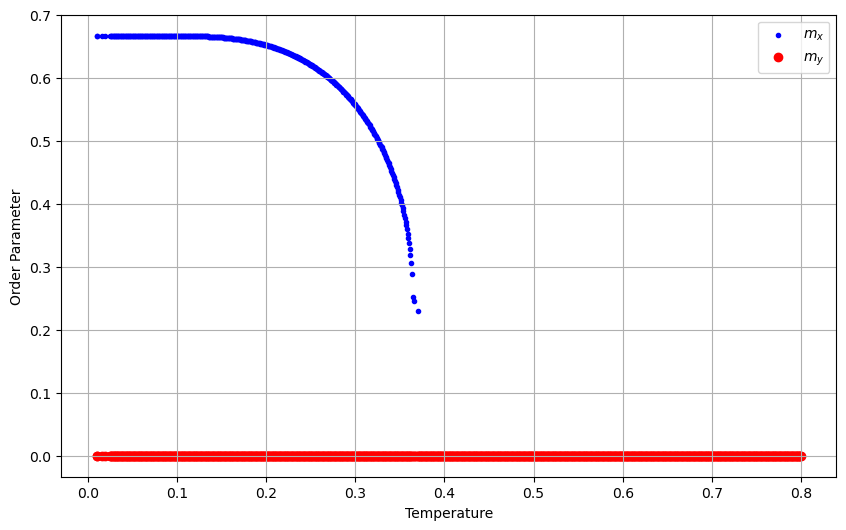

In [111]:
def stability_condition(m_x, m_y, T): 
    return True if f_xx(m_x, m_y, T)*f_yy(m_x, m_y, T) - (f_xy(m_x, m_y, T))**2>0 and f_xx(m_x, m_y, T) > 0 else False  

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 0.8, 1000)
m_x_vals = []
m_y_vals = []

for t in T_vals:
    sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
    m_x_vals.append(sol[0])
    m_y_vals.append(sol[1]) 


m_x_stable=[]
m_y_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_condition(m_x_vals[i],m_y_vals[i],T_vals[i]):
        m_x_stable.append(m_x_vals[i]) 
        m_y_stable.append(m_y_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_stable, m_x_stable, label=r'$m_x$', color='blue',s=9)
plt.scatter(T_stable, m_y_stable, label=r'$m_y$', color='red')


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()

## Maier Saupe Model 

Our free energy is now: 

$$f(t,S,\eta)=\frac{3}{4}S^2 + \frac{\eta^2}{4}-t\ln 2 - t\ln \left[ e^{-\frac{S+\eta}{t}}+e^{\frac{\eta-S}{t}}+e^{2\frac{S}{t}}\right]$$

In [139]:
def f_S(t,S,n):
    exp_1=np.exp(2*n/t)
    exp_2=np.exp((3*S+n)/t)

    common_term=1+exp_1 
    num= 3*common_term 
    denom= common_term + exp_2 
    
    return 3*S/2 + num/denom -2 

def f_n(t,S,n):
    exp_1=np.exp(2*n/t)
    exp_2=np.exp((3*S+n)/t)


    num= 1-exp_1  
    denom= 1 + exp_1  + exp_2 
    
    return num/denom + n/2 

def f_SS(t,S,n):
    exp_1=np.exp(2*n/t)
    exp_2=np.exp((3*S+n)/t)
    common_term=1+exp_1  

    num= 9*exp_2*common_term 
    denom= t*(common_term +exp_2)**2 
    
    return 3/2 - num/denom 

def f_nn(t,S,n):
    exp_1=np.exp(2*n/t)
    exp_2=np.exp((3*S+n)/t)
    common_term=1+exp_1 

    num= (-1+exp_1)**2 
    denom1= t*(common_term +exp_2)**2 
    denom2= t + (t*exp_2)/common_term

    return 1/2 + num/denom1 - 1/denom2 

def f_Sn(t,S,n):
    exp_1=np.exp(2*n/t)
    exp_2=np.exp((3*S+n)/t)

    num= 3*exp_2*(-1+exp_1)
    denom= t*(1+exp_1+exp_2)**2
    
    return num/denom  

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/505754100.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(lambda x : [f_S(t,x[0],x[1]), f_n(t,x[0],x[1])], [0.6, 0.6])
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/505754100.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda x : [f_S(t,x[0],x[1]), f_n(t,x[0],x[1])], [0.6, 0.6])
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2060673328.py:22: RuntimeWarning: overflow encountered in exp
  exp_1=np.exp(2*n/t)
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2060673328.py:23: RuntimeWarning: overflow encountered in exp
  exp_2=np.exp((3*S+n)/t)
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2060673328.py:29: RuntimeWarning: invalid value encountered 

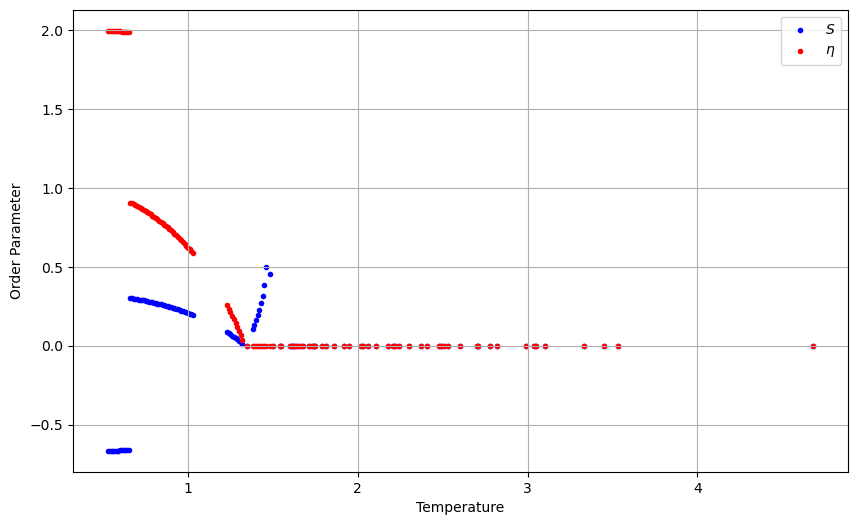

In [148]:
def stability_condition(m_x, m_y, T): 
    return True if f_SS(m_x, m_y, T)*f_nn(m_x, m_y, T) - (f_Sn(m_x, m_y, T))**2>0 and f_SS(m_x, m_y, T) > 0 else False  

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 100, 10000)
S_vals = []
n_vals = []

for t in T_vals:
    sol = fsolve(lambda x : [f_S(t,x[0],x[1]), f_n(t,x[0],x[1])], [0.6, 0.6]) 
    S_vals.append(sol[0])
    n_vals.append(sol[1]) 


S_stable=[]
n_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_condition(S_vals[i],n_vals[i],T_vals[i]):
        S_stable.append(S_vals[i]) 
        n_stable.append(n_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_stable, S_stable, label=r'$S$', color='blue',s=9)
plt.scatter(T_stable, n_stable, label=r'$\eta$', color='red',s=9)

#plt.scatter(T_vals, S_vals, label=r'$S$', color='blue',s=9)
#plt.scatter(T_vals, n_vals, label=r'$\eta$', color='red',s=9)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()